In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

# Para que los gráficos se vean en el notebook
%matplotlib inline

# 1. Regresión Logística

## 1.1 Fundamentos de la técnica

La **regresión logística** es un modelo de clasificación supervisada que se utiliza
cuando la variable de salida es categórica, normalmente binaria (por ejemplo:
0 = no tiene la enfermedad, 1 = tiene la enfermedad).

En lugar de predecir directamente un valor continuo, la regresión logística
modela la **probabilidad** de pertenecer a una clase. A partir de esa probabilidad,
se aplica un umbral (normalmente 0.5) para decidir si el patrón se clasifica
como clase 0 o clase 1.

Se llama "regresión" porque internamente ajusta un modelo lineal sobre las
características, pero la salida pasa por una función sigmoide para producir
valores entre 0 y 1.


## 1.2 Modelo matemático

Dado un vector de características \( \mathbf{x} = [x_1, x_2, \dots, x_d] \),  
la regresión logística calcula primero una combinación lineal:

$$
z = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_d x_d
$$

Luego pasa este valor por la función sigmoide:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

La salida \( \sigma(z) \) se interpreta como la **probabilidad** de que la clase sea 1:

$$
P(y = 1 \mid \mathbf{x}) = \sigma(z)
$$

Para clasificar, se usa un umbral:

$$
\hat{y} =
\begin{cases}
1 & \text{si } \sigma(z) \ge 0.5 \\
0 & \text{en otro caso}
\end{cases}
$$


## 1.3 Librería, clases y funciones usadas

En este notebook utilizo principalmente la librería **scikit-learn** (`sklearn`),
que es un paquete muy usado en Python para Machine Learning.

Clases y funciones principales:

- `sklearn.datasets.load_breast_cancer`  
  Nos da un dataset real de cáncer de mama, ya dividido en características (X) y etiqueta (y).

- `train_test_split` (de `sklearn.model_selection`)  
  Separa el dataset en conjunto de **entrenamiento** y **prueba**.

- `StandardScaler` (de `sklearn.preprocessing`)  
  Estandariza las características (media 0, desviación estándar 1), lo cual
  suele ayudar a los algoritmos lineales como la regresión logística.

- `LogisticRegression` (de `sklearn.linear_model`)  
  Implementa el modelo de regresión logística en scikit-learn.

- `Pipeline` (de `sklearn.pipeline`)  
  Permite encadenar varias etapas (por ejemplo: escalado + modelo)
  en un solo objeto.

- `confusion_matrix` y `accuracy_score` (de `sklearn.metrics`)  
  Nos permiten evaluar el desempeño del modelo.


In [3]:
# Cargar dataset de cáncer de mama
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

X.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Descripción estadística general
descripcion = X.describe()  # incluye count, mean, std, min, 25%, 50%, 75%, max
descripcion


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
# Mostrar promedio, desviación estándar, min y max de forma resumida
estadisticas = pd.DataFrame({
    "mean": X.mean(),
    "std": X.std(),
    "min": X.min(),
    "max": X.max()
})
estadisticas.head()


,mean,std,min,max
mean radius,14.127292,3.524049,6.98100,28.1100
mean texture,19.289649,4.301036,9.71000,39.2800
mean perimeter,91.969033,24.298981,43.79000,188.5000
mean area,654.889104,351.914129,143.50000,2501.0000
mean smoothness,0.096360,0.014064,0.05263,0.1634


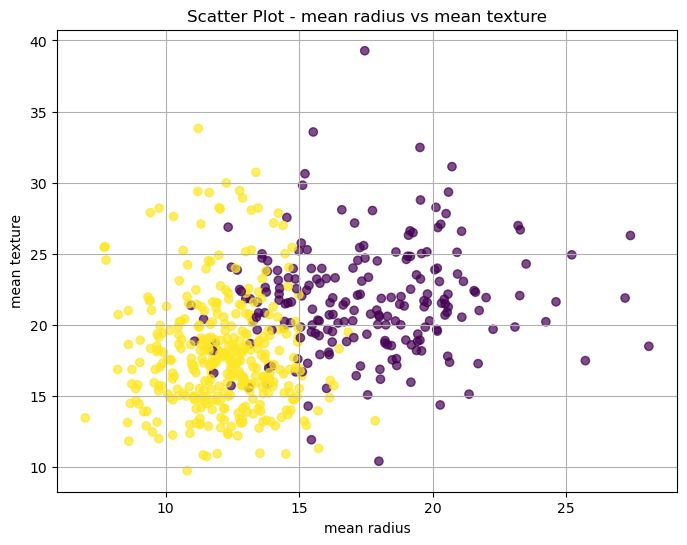

In [10]:
# Seleccionamos dos características
feature_x = "mean radius"
feature_y = "mean texture"

plt.figure(figsize=(8, 6))
plt.scatter(
    X[feature_x],
    X[feature_y],
    c=y,          # color por clase
    alpha=0.7
)
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("Scatter Plot - mean radius vs mean texture")
plt.grid(True)
plt.show()


In [11]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Definir pipeline: escalado + regresión logística
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000))])

In [13]:
def predecir_clase(patron):
    """
    patron: lista o array con las características del paciente.
    Debe tener la misma cantidad de columnas que X.
    """
    # Convertir el patrón a DataFrame con los nombres de columnas correctos
    patron_df = pd.DataFrame([patron], columns=X.columns)

    probas = pipeline.predict_proba(patron_df)[0]
    clase_pred = pipeline.predict(patron_df)[0]

    print(f"Clase predicha: {clase_pred} ({data.target_names[clase_pred]})")
    print(f"Probabilidades (clase 0={data.target_names[0]}, clase 1={data.target_names[1]}):")
    print(probas)

    return clase_pred, probas

# Ejemplo: usar el primer elemento del conjunto de prueba
ejemplo = X_test.iloc[0].values
predecir_clase(ejemplo)


Clase predicha: 0 (malignant)
Probabilidades (clase 0=malignant, clase 1=benign):
[9.99999941e-01 5.88824186e-08]


(np.int64(0), array([9.99999941e-01, 5.88824186e-08]))

In [14]:
# Predicciones sobre el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Matriz de confusión:")
print(cm)
print("\nAccuracy:", acc)


Matriz de confusión:
[[41  1]
 [ 1 71]]

Accuracy: 0.9824561403508771


### 1.4.4 Evaluación del modelo

- **Matriz de confusión**: la matriz muestra cuántos ejemplos de cada clase
fueron correctamente o incorrectamente clasificados.  
  - La diagonal principal corresponde a las predicciones correctas.  
  - Los valores fuera de la diagonal indican errores de clasificación.

- **Accuracy**: es la proporción de ejemplos correctamente clasificados sobre
el total. Un valor cercano a 1 indica que el modelo está acertando la mayoría
de las veces. En este dataset, la regresión logística suele alcanzar una
exactitud bastante alta.


In [15]:
## 3. Referencias bibliográficas

- codebasics. (2018, 7 septiembre). 
Machine Learning Tutorial Python - 8: 
Logistic Regression (Binary Classification) [Vídeo]. 
YouTube. https://www.youtube.com/watch?v=zM4VZR0px8E

- Documentación oficial de scikit-learn:
  https://scikit-learn.org/stable/


SyntaxError: invalid syntax (1959992582.py, line 3)